In [74]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [75]:
df = pd.DataFrame(["market_data_df"])

In [76]:
df = pd.DataFrame(["crypto_market_data"])

In [77]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
crypto_market_data_df = pd.read_csv("crypto_market_data.csv", index_col = "coin_id")  


# Display sample data
crypto_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [78]:
# Generate summary statistics
crypto_market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [79]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(crypto_market_data_df)


In [80]:
# Create a DataFrame with the scaled data
crypto_market_data_scaled = pd.DataFrame(scaled_data, columns=crypto_market_data_df.columns)


# Copy the crypto names from the original data
crypto_market_data_scaled["coin_id"] = crypto_market_data_df.index

# Set the coinid column as index
crypto_market_data_scaled = crypto_market_data_scaled.set_index("coin_id")

# Display sample data
crypto_market_data_scaled.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [81]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
inertia = []
k = list(range(1,11))

# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
def calculate_elbow_curve(crypto_market_data_scaled, k_values):
    inertia = []
    for i in k_values:
        model = KMeans(n_clusters=i, n_init='auto', random_state=1)
        model.fit(crypto_market_data_scaled)
        inertia.append(model.inertia_)

    # Create a dictionary with the data to plot the Elbow curve
    elbow_data = {
        "k": k_values,
        "inertia": inertia
}

    return elbow_data
# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame(calculate_elbow_curve(crypto_market_data_scaled, k_values=k))

# Display the DataFrame
elbow_data_df

c:\Users\Roberta Chandler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Roberta Chandler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Roberta Chandler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Roberta Chandler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

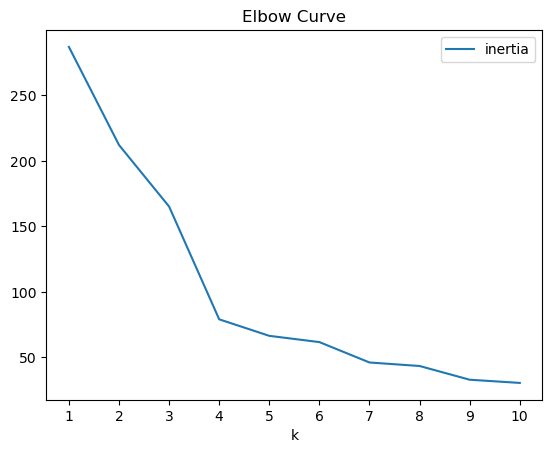

In [82]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import plotly.express as px
elbow_plot = elbow_data_df.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k)
elbow_plot


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 is the best value as the trend flattening out at that point

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [83]:
# Initialize the K-Means model using the best value for k
K_Means_best_value = 4
KMeans_model = KMeans(n_clusters= K_Means_best_value, random_state=1)

In [84]:
# Fit the K-Means model using the scaled data
KMeans_model.fit(crypto_market_data_scaled)

c:\Users\Roberta Chandler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, random_state=1)

In [85]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = KMeans_model.predict(crypto_market_data_scaled)

# View the resulting array of cluster values.
predicted_clusters


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [86]:
# Create a copy of the DataFrame
clustered_df = crypto_market_data_scaled.copy()

In [87]:
# Add a new column to the DataFrame with the predicted clusters
crypto_market_data_scaled['predicted_crypto_clusters'] = predicted_clusters

# Display sample data
crypto_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_crypto_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [88]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
fig = px.scatter(
    crypto_market_data_scaled,
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    color='price_change_percentage_24h',
    color_continuous_scale='Rainbow',
    title='Scatter Plot of Price Changes'
)
fig.show()

### Optimize Clusters with Principal Component Analysis.

In [89]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [90]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_transformed_data = pca.fit_transform(crypto_market_data_scaled)

# View the first five rows of the DataFrame. 
pca_transformed_data[0:5]

array([[ 0.44890795, -1.24537573, -0.8506404 ],
       [ 0.49536709, -0.899823  , -1.31755943],
       [-0.81884571,  0.07189909,  0.69501507],
       [-0.84035711,  0.08005407,  0.54435952],
       [ 0.81324004, -2.66952035, -1.64332113]])

In [91]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio[0:3]

array([0.34871677, 0.31363391, 0.22627118])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8886218549859446
            

In [92]:
total_explained_variance = explained_variance_ratio.sum()
print(total_explained_variance)

0.8886218549859446


In [93]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
PCA_data_df = pd.DataFrame(pca_transformed_data,columns = ["PCA1", "PCA2", "PCA3"])

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data
PCA_data_df["coin_id"] = PCA_data_df.index

# Set the coinid column as index
PCA_data_df = PCA_data_df.set_index('coin_id')

# Display sample data
PCA_data_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
0,0.448908,-1.245376,-0.850640
1,0.495367,-0.899823,-1.317559
2,-0.818846,0.071899,0.695015
3,-0.840357,0.080054,0.544360
4,0.813240,-2.669520,-1.643321
5,0.822871,-1.682096,-0.905203
6,0.913868,-1.128684,-2.730038
7,0.811102,-1.113378,-1.598655
8,0.258728,-0.946884,-1.103560


### Find the Best Value for k Using the PCA Data

In [94]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
inertia = []
k = list(range(1,11))


# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

inertia = []
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(PCA_data_df)
    inertia.append(model.inertia_)

    # Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
"k": k,
"inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_pca

c:\Users\Roberta Chandler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Roberta Chandler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Roberta Chandler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Roberta Chandler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Window

,k,inertia
0,1,290.622694
1,2,207.307439
2,3,123.126951
3,4,44.130602
4,5,33.217427
5,6,23.374713
6,7,20.943077
7,8,18.666961
8,9,13.640110
9,10,10.287149


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

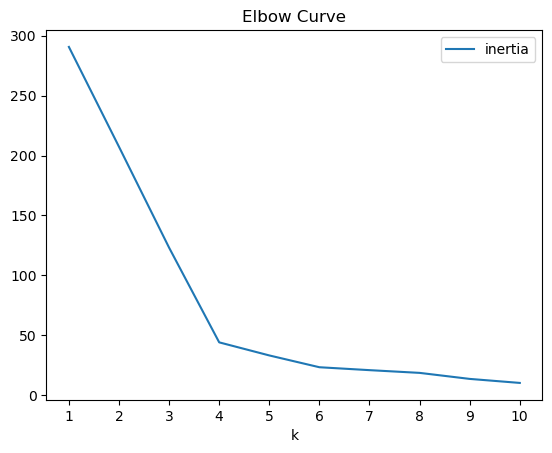

In [95]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.plot.line(
    x="k",
    y="inertia", 
    title="Elbow Curve",
    xticks=k)
elbow_plot_pca

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 is the best value


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No difference

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [96]:
# Initialize the K-Means model using the best value for k
K_Means_best_value = 4
KMeans_pca = KMeans(n_clusters= K_Means_best_value, random_state=1)


In [97]:
# Fit the K-Means model using the PCA data
KMeans_pca.fit(PCA_data_df)

c:\Users\Roberta Chandler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, random_state=1)

In [98]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = KMeans_pca.predict(PCA_data_df)

# Print the resulting array of cluster values.
predicted_clusters


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [99]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = PCA_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
PCA_data_df['crypto_cluster'] = predicted_clusters

# Display sample data
PCA_data_df.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
0,0.448908,-1.245376,-0.850640,2
1,0.495367,-0.899823,-1.317559,2
2,-0.818846,0.071899,0.695015,0
3,-0.840357,0.080054,0.544360,0
4,0.813240,-2.669520,-1.643321,2


In [100]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import plotly.express as px
fig = px.scatter(
    PCA_data_df,
    x='PCA1',
    y='PCA2',
    color='crypto_cluster',
    color_continuous_scale='Rainbow',
    title='Scatter Plot of Price Changes'
)

fig.show()

### Determine the Weights of Each Feature on each Principal Component

In [101]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=crypto_market_data_scaled.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.219011,-0.499630,0.181473
price_change_percentage_7d,0.178767,-0.319433,-0.546037
price_change_percentage_14d,0.297589,-0.483024,-0.081269
price_change_percentage_30d,0.361440,-0.342065,0.370361
price_change_percentage_60d,0.368955,-0.148288,0.500222
price_change_percentage_200d,0.493587,0.294811,0.123208
price_change_percentage_1y,0.431207,0.410509,-0.075030
predicted_crypto_clusters,0.367672,-0.143495,-0.504090


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** For PCA1: "price_change_percentage_200d", "price_change_percentage_1y", and "price_change_percentage_60d" have the strongest positive influence. For PCA2: "price_change_percentage_30d", "price_change_percentage_14d", and "price_change_percentage_60d" have the strongest positive influence. For PCA3: "price_change_percentage_7d" and "price_change_percentage_14d" have the strongest positive influence.
    